Box Muller : Este método me permite obtener dos variables aleatorias normales independientes en [0,1] mediante el uso de otras dos variables aleatorias que siguen otras distribuciones más fáciles de programar.

Estas otras variables son R2 (abreviación para R**2) y Theta. R2 sigue una distribución exponencial con media 1/2 y Theta una distribución uniforme en el intervalo [0,2pi]. Ésto viene de el hecho de calcular la distribución de probabilidad conjunta para las dichas variables normales independiantes, en ésta de identifican don funciónes de probabilidad, las de R2 y Theta.

-------------

El código lo que hace es crear 2 funciones Box_Muller. La primera usa un condicional en el valor de R2 para descartar los puntos con R2>1 y la segunda usa una modulación a 1 para aprovechar todos los puntos generados

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
# Estilo de gráficos
plt.style.use('dark_background')

In [3]:
def Box_Muller_v1(N):
    """ Devuelve dos variables normales aleatorias en (-1,1)
    
    Parameters
    ----------
    N : int
        Cantidad de puntos para las variables aleatorias
        
    Returns
    -------
    np.ndarray, np.ndarray
        Dos arreglos numpy que materializan las dos variables aleatorias normales en (-1,1)
        
    """
    # Errores
    if N<1:
        raise ValueError('Error: N debe ser un natural mayor a 0')
    # -------
    import numpy as np 
    # Creo las variables R**2 y el ángulo theta
    R2 = (1/2.)*np.random.exponential(1/2, N) 
    Theta = 2*np.pi*np.random.random(N) 
    # Encuentro las variables normales "x" e "y"
    x = []
    y = []
    ij = 0
    while ij<N:
        if R2[ij]<1:
            x.append( np.sqrt(R2[ij])*np.cos(Theta[ij]) )
            y.append( np.sqrt(R2[ij])*np.sin(Theta[ij]) )
        ij = ij + 1      
    # Transformo a numpy array 
    x = np.array(x)
    y = np.array(y)
    return x, y

In [4]:
# Creación de números aleatorios que siguen una gaussiana a partir de mi función:
Nums = 10000
a, b = Box_Muller_v1(Nums)
# Para ver cuántos puntos se aprovecharon calculo:
Porc_aprov = 100*len(a)/Nums
print('% de puntos aprovechados:', Porc_aprov)

% de puntos aprovechados: 97.96


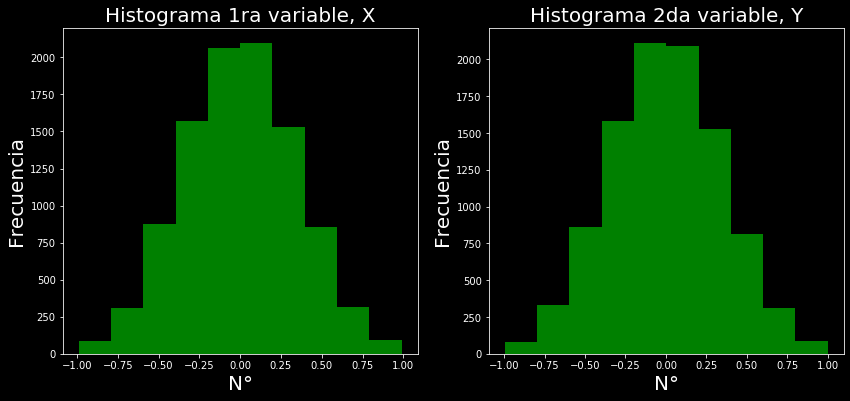

In [5]:
# Histogramas
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].hist(a, color='green')
ax[1].hist(b, color='green')

ax[0].set_title('Histograma 1ra variable, X', fontsize=20)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('Frecuencia', fontsize=20);
ax[1].set_title('Histograma 2da variable, Y', fontsize=20)
ax[1].set_xlabel('N°', fontsize=20)
ax[1].set_ylabel('Frecuencia', fontsize=20);

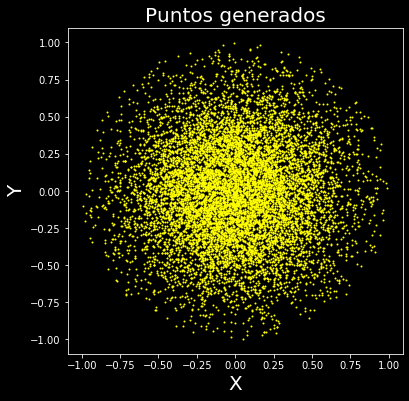

In [6]:
# Puntos generados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a, b, s=1, color='yellow')

ax.set_title('Puntos generados', fontsize=20)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20);

## Optimización:
 Para crear "x" e "y" tal que siempre vivan en el círculo de radio 1 uso el truco de hacer una modulación a 1 para el valor de R2

In [7]:
def Box_Muller_v2(N):
    """ Devuelve dos variables normales aleatorias en (-1,1). Versión optimizada
    
    Parameters
    ----------
    N : int
        Cantidad de puntos para las variables aleatorias. Se cumple que N>0
        
    Returns
    -------
    np.ndarray, np.ndarray
        Dos arreglos numpy que materializan las dos variables aleatorias normales en (-1,1)
        
    """
    # Errores
    if N<1:
        raise ValueError('Error: N debe ser un natural mayor a 0')
    # -------
    import numpy as np 
    # Creo las variables R**2 y el ángulo theta
    R2 = (1/2.)*np.random.exponential(1/2., N) % 1 # Truco para optimizar 
    Theta = 2*np.pi*np.random.random(N) 
    # Encuentro las variables normales "x" e "y"
    x = []
    y = []
    ij = 0
    while ij<N:
        x.append( np.sqrt(R2[ij])*np.cos(Theta[ij]) )
        y.append( np.sqrt(R2[ij])*np.sin(Theta[ij]) )
        ij = ij + 1      
    # Transformo a numpy array 
    x = np.array(x)
    y = np.array(y)
    return x, y

In [8]:
#Calculo nuevas variables aleatorias que siguen la gaussiana
a2,b2 = Box_Muller_v2(Nums)
# Para ver cuántos puntos se aprovecharon calculo:
Porc_aprov = 100*len(a2)/Nums
print('% de puntos aprovechados:', Porc_aprov)

% de puntos aprovechados: 100.0


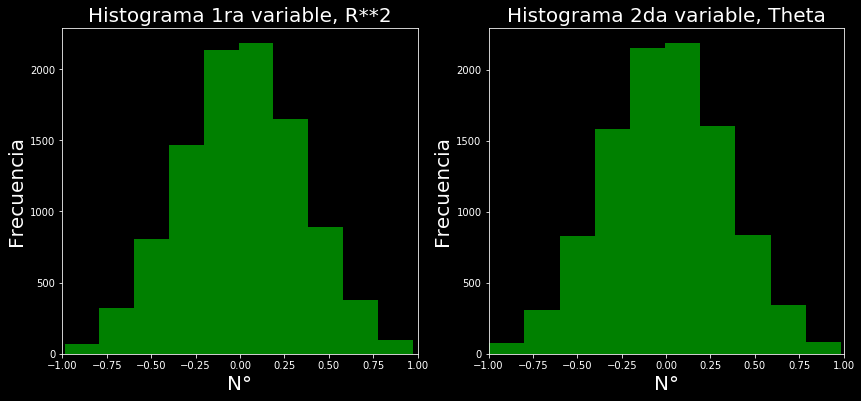

In [9]:
# Histogramas
fig, ax = plt.subplots(1, 2, figsize = (14,6))

ax[0].hist(a2, color='green')
ax[1].hist(b2, color='green')

ax[0].set_title('Histograma 1ra variable, R**2', fontsize=20)
ax[0].set_xlim(-1,1)
ax[0].set_xlabel('N°', fontsize=20)
ax[0].set_ylabel('Frecuencia', fontsize=20);
ax[1].set_title('Histograma 2da variable, Theta', fontsize=20)
ax[1].set_xlim(-1,1)
ax[1].set_xlabel('N°', fontsize=20)
ax[1].set_ylabel('Frecuencia', fontsize=20);

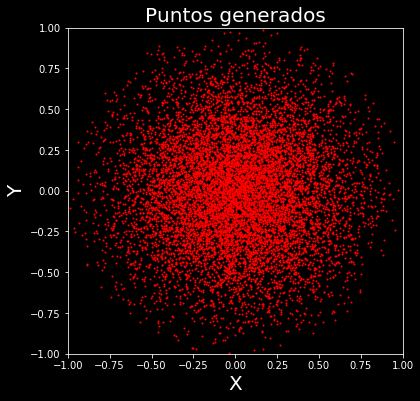

In [10]:
# Puntos generados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a2, b2, s=1, color='red')

ax.set_title('Puntos generados', fontsize=20)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20);

Comparación entre los dos métodos

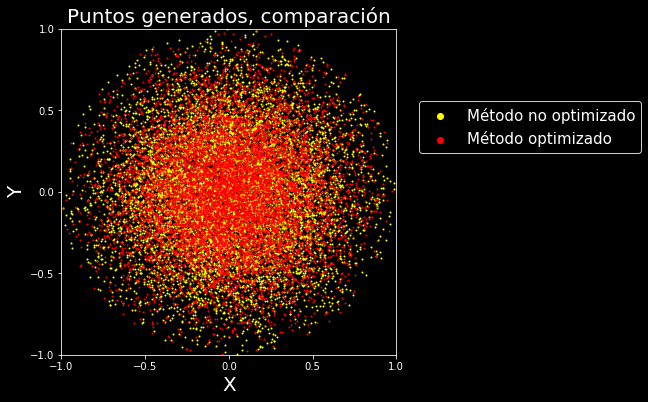

In [11]:
# Puntos generados comparados
fig, ax = plt.subplots(1, 1, figsize = (6,6))

ax.scatter(a, b, s=1, color='yellow', label='Método no optimizado')
ax.scatter(a2, b2, s=1, color='red', label='Método optimizado')

ax.set_title('Puntos generados, comparación', fontsize=20)
ax.set_xticks(np.arange(-1, 1.5, step = 0.5))   
ax.set_yticks(np.arange(-1, 1.5, step = 0.5)) 
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.legend(loc='upper center', bbox_to_anchor=(1.4, 0.8), fancybox=True,
             shadow=True, ncol=1, fontsize=15, markerscale=6);